In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import random_split
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torchvision.models as models  
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import time
from timeit import default_timer as timer




In [2]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        num_images = len([f for f in filenames if f.endswith('.png') or f.endswith('.jpg')])
        print(f"There are {len(dirnames)} directories and {num_images} images in '{dirpath}'.")
        for dirname in dirnames:
            print(f"  Subdirectory: {dirname}")

walk_through_dir('data')


There are 657 directories and 0 images in 'data'.
  Subdirectory: 000
  Subdirectory: 001
  Subdirectory: 002
  Subdirectory: 003
  Subdirectory: 004
  Subdirectory: 005
  Subdirectory: 006
  Subdirectory: 007
  Subdirectory: 008
  Subdirectory: 009
  Subdirectory: 010
  Subdirectory: 011
  Subdirectory: 012
  Subdirectory: 013
  Subdirectory: 014
  Subdirectory: 015
  Subdirectory: 016
  Subdirectory: 017
  Subdirectory: 018
  Subdirectory: 019
  Subdirectory: 020
  Subdirectory: 021
  Subdirectory: 022
  Subdirectory: 023
  Subdirectory: 024
  Subdirectory: 025
  Subdirectory: 026
  Subdirectory: 027
  Subdirectory: 028
  Subdirectory: 029
  Subdirectory: 030
  Subdirectory: 031
  Subdirectory: 032
  Subdirectory: 033
  Subdirectory: 034
  Subdirectory: 035
  Subdirectory: 036
  Subdirectory: 037
  Subdirectory: 038
  Subdirectory: 039
  Subdirectory: 040
  Subdirectory: 041
  Subdirectory: 042
  Subdirectory: 043
  Subdirectory: 044
  Subdirectory: 045
  Subdirectory: 046
  Subdirec

In [3]:
from pathlib import Path
data_path = Path('data')

In [4]:
from pathlib import Path

# Specify the path to your data directory
data_path = Path('data')

# Check if the directory exists
if data_path.exists() and data_path.is_dir():
    print("Directory exists. Checking contents:")
    
    # Use rglob to search recursively for all files
    files = list(data_path.rglob('*'))  # Get all files in subdirectories

    # Print each file name
    for file in files:
        if file.is_file():  # Ensure it is a file
            print(file.name)  # Print each file name
            
    # Count the number of files
    num_samples = sum(1 for file in files if file.is_file())
    print(f'Number of samples in the dataset: {num_samples}')
else:
    print("Directory does not exist.")

Directory exists. Checking contents:
label_10_a01-049u.png
label_11_a01-049x.png
label_12_a01-053u.png
label_13_a01-058u.png
label_14_a01-063u.png
label_15_a01-068u.png
label_16_a01-072u.png
label_17_a01-077u.png
label_18_a01-082u.png
label_19_a01-087u.png
label_1_a01-000u.png
label_20_a01-091u.png
label_21_a01-096u.png
label_22_a01-102u.png
label_23_a01-107u.png
label_24_a01-113u.png
label_25_a01-117u.png
label_26_a01-122u.png
label_27_a01-128u.png
label_28_a01-132u.png
label_29_a01-132x.png
label_2_a01-003u.png
label_30_a03-050.png
label_31_a03-071.png
label_32_a03-073.png
label_33_a03-080.png
label_34_a03-089.png
label_35_a05-000.png
label_36_a05-013.png
label_37_a05-017.png
label_38_a05-022.png
label_39_a05-025.png
label_3_a01-007u.png
label_40_a05-029.png
label_41_a05-039.png
label_42_a05-044.png
label_43_a05-048.png
label_44_a05-053.png
label_45_a05-058.png
label_46_a05-062.png
label_47_a05-069.png
label_48_a05-073.png
label_49_a05-080.png
label_4_a01-011u.png
label_50_a05-084.pn

Displaying first 5 images:


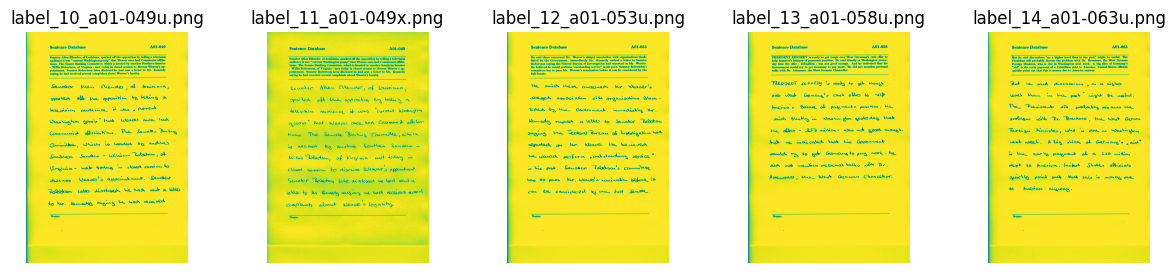

In [5]:
# Display the first 5 images
image_paths = [file for file in files if file.is_file() and file.suffix.lower() in ['.png', '.jpg', '.jpeg', '.bmp']]  # Filter for image files
if len(image_paths) > 0:
    print("Displaying first 5 images:")
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  
    for ax, image_path in zip(axes, image_paths[:5]):  
        img = Image.open(image_path) 
        ax.imshow(img)
        ax.set_title(image_path.name)  
        ax.axis('off')  
    plt.show()
else:
    print("No image files found in the dataset.")


In [6]:
from pathlib import Path

# Specify the path to your data directory
data_path = Path('data')

# Check if the directory exists
if data_path.exists() and data_path.is_dir():
    print("Directory exists. Checking for labeled files:")
    
    # Use rglob to search recursively for all files
    files = list(data_path.rglob('*'))  # Get all files in subdirectories

    labeled_files = []  # To store files with 'label' in their name

    # Check each file name for labels
    for file in files:
        if file.is_file():  # Ensure it is a file
            if 'label' in file.name.lower():  # Check if 'label' is in the file name
                labeled_files.append(file.name)

    # Output the labeled files
    if labeled_files:
        print(f'Labeled files ({len(labeled_files)}):')
        for labeled_file in labeled_files[:10]:  # Print up to 10 labeled files
            print(labeled_file)
    else:
        print('No labeled files found.')
else:
    print("Directory does not exist.")


Directory exists. Checking for labeled files:
Labeled files (1539):
label_10_a01-049u.png
label_11_a01-049x.png
label_12_a01-053u.png
label_13_a01-058u.png
label_14_a01-063u.png
label_15_a01-068u.png
label_16_a01-072u.png
label_17_a01-077u.png
label_18_a01-082u.png
label_19_a01-087u.png


In [7]:
from pathlib import Path

# Specify the path to your data directory
data_path = Path('data')

# Initialize a counter for labeling
counter = 1

# Iterate through all files in the specified directory
for file in data_path.rglob('*'):
    if file.is_file() and 'label' not in file.name.lower():
        # Create a new name with a numeric label
        new_name = file.with_name(f"label_{counter}_{file.name}")
        file.rename(new_name)  # Rename the file
        counter += 1  # Increment the counter for the next file


In [8]:
from pathlib import Path

data_path = Path('data')
all_files = list(data_path.rglob('*'))  # Get all files in subdirectories

# Count total samples and labeled samples
num_samples = sum(1 for file in all_files if file.is_file())
num_labeled = sum(1 for file in all_files if file.is_file() and 'label' in file.name.lower())

print(f'Total number of samples in the dataset: {num_samples}')
print(f'Number of labeled files: {num_labeled}')


Total number of samples in the dataset: 1539
Number of labeled files: 1539


In [11]:
image_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels = 1),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])
image_transforms

Compose(
    Grayscale(num_output_channels=1)
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [12]:
from pathlib import Path
from torchvision import transforms
from PIL import Image


# Get images from immediate subdirectories
image_path_list = list(data_path.glob("*/*"))

# Process each image
for image_path in image_path_list:
    if image_path.is_file():  # Ensure it's a file
        # Open the image
        image = Image.open(image_path)
        
        # Apply the transformations
        transformed_image = image_transforms(image)
        
        # Print the shape of the transformed image tensor
        print(f'Transformed {image_path.name}: {transformed_image.shape}')


Transformed label_10_a01-049u.png: torch.Size([1, 128, 128])
Transformed label_11_a01-049x.png: torch.Size([1, 128, 128])
Transformed label_12_a01-053u.png: torch.Size([1, 128, 128])
Transformed label_13_a01-058u.png: torch.Size([1, 128, 128])
Transformed label_14_a01-063u.png: torch.Size([1, 128, 128])
Transformed label_15_a01-068u.png: torch.Size([1, 128, 128])
Transformed label_16_a01-072u.png: torch.Size([1, 128, 128])
Transformed label_17_a01-077u.png: torch.Size([1, 128, 128])
Transformed label_18_a01-082u.png: torch.Size([1, 128, 128])
Transformed label_19_a01-087u.png: torch.Size([1, 128, 128])
Transformed label_1_a01-000u.png: torch.Size([1, 128, 128])
Transformed label_20_a01-091u.png: torch.Size([1, 128, 128])
Transformed label_21_a01-096u.png: torch.Size([1, 128, 128])
Transformed label_22_a01-102u.png: torch.Size([1, 128, 128])
Transformed label_23_a01-107u.png: torch.Size([1, 128, 128])
Transformed label_24_a01-113u.png: torch.Size([1, 128, 128])
Transformed label_25_a01-

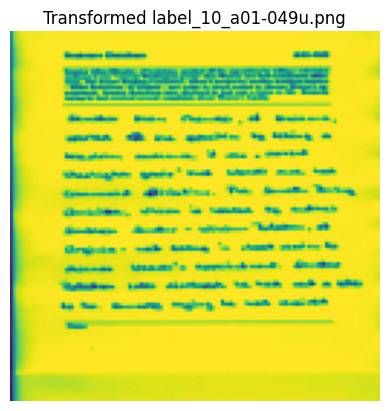

Transformed label_10_a01-049u.png: torch.Size([1, 128, 128])


In [14]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Get images from immediate subdirectories
image_path_list = list(data_path.glob("*/*"))

# Process each image
for image_path in image_path_list:
    if image_path.is_file():  # Ensure it's a file
        # Open the image
        image = Image.open(image_path)
        
        # Apply the transformations
        transformed_image = image_transforms(image)
        
        # Convert the tensor back to a PIL image for visualization
        to_pil = T.ToPILImage()
        pil_image = to_pil(transformed_image)
        
        # Display the image
        plt.imshow(pil_image)
        plt.title(f'Transformed {image_path.name}')
        plt.axis('off')  # Hide axes for better visibility
        plt.show()
        
        # Print the shape of the transformed image tensor
        print(f'Transformed {image_path.name}: {transformed_image.shape}')
        break  # Break after the first image if you only want to show one


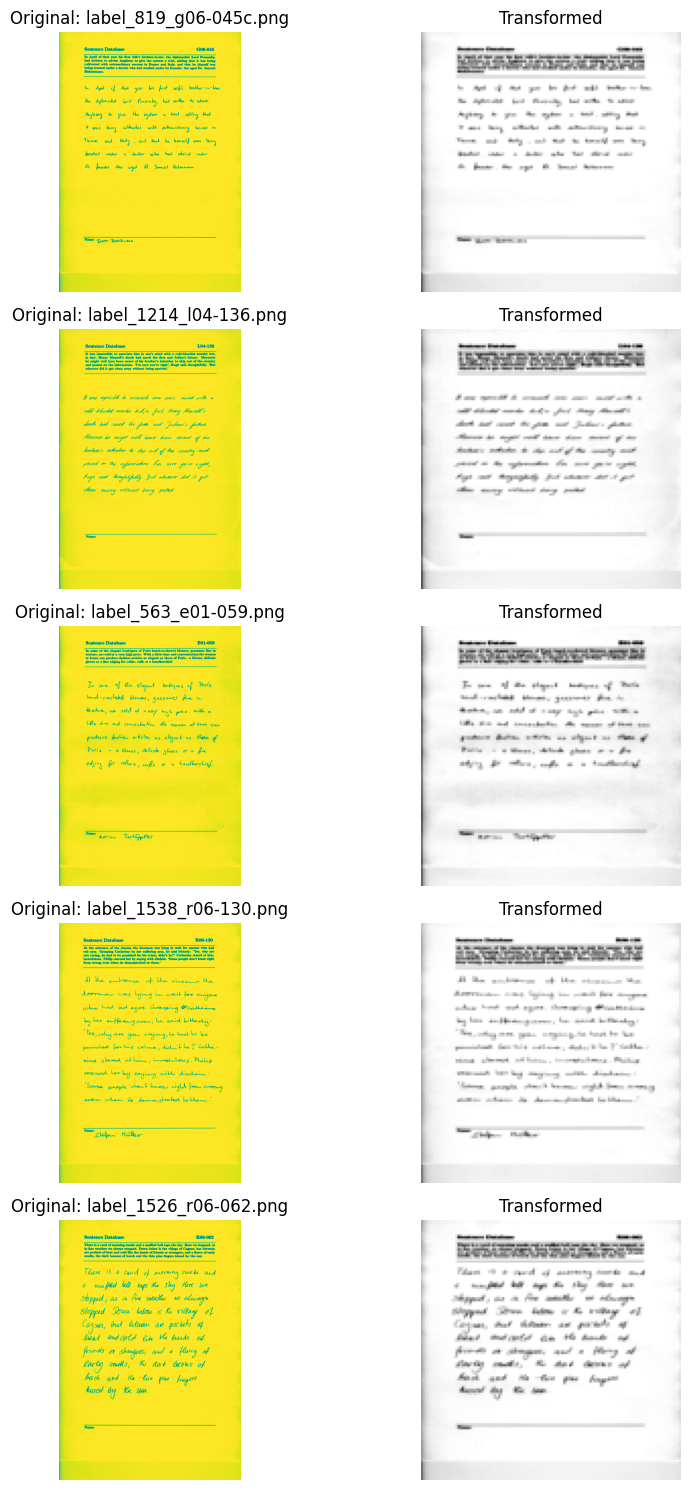

In [13]:
import random
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

def plot_transformed_image(image_path_list, image_transforms, num_samples=5):
    # Randomly select a few image paths from the list
    sampled_paths = random.sample(image_path_list, min(num_samples, len(image_path_list)))

    # Prepare to display the selected images
    sample_images = []
    for image_path in sampled_paths:
        if image_path.is_file():  # Ensure it's a file
            # Open the image
            image = Image.open(image_path)

            # Apply the transformations
            transformed_image = image_transforms(image)

            # Append the original and transformed images along with their names for display
            sample_images.append((image, transformed_image, image_path.name))

    # Plot the original and transformed images side by side
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 3 * num_samples))
    for ax, (img, transformed_img, img_name) in zip(axes, sample_images):
        # Original image
        ax[0].imshow(img)
        ax[0].set_title(f'Original: {img_name}')
        ax[0].axis('off')

        # Transformed image
        img_display = transformed_img.permute(1, 2, 0).numpy()  # Change to (H, W, C) format
        img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min())  # Normalize
        ax[1].imshow(img_display.squeeze(), cmap='gray')
        ax[1].set_title('Transformed')
        ax[1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_transformed_image(image_path_list, image_transforms)


Original label_10_a01-049u.png: (2479, 3542)
Transformed label_10_a01-049u.png: torch.Size([1, 128, 128])


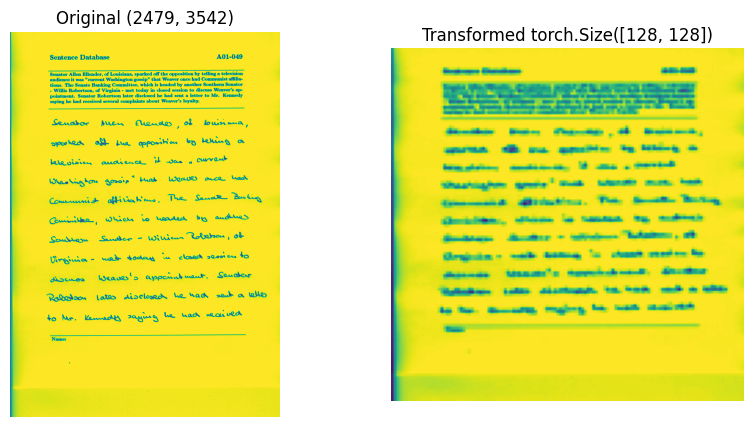

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

# Get images from immediate subdirectories
image_path_list = list(data_path.glob("*/*"))

# Process each image
for image_path in image_path_list:
    if image_path.is_file():  # Ensure it's a file
        # Open the original image
        image = Image.open(image_path)
        
        # Print original image size
        print(f'Original {image_path.name}: {image.size}')  # size is (width, height)
        
        # Apply the transformations (including resizing to 128x128)
        transformed_image = image_transforms(image)
        
        # Print the shape of the transformed image tensor
        print(f'Transformed {image_path.name}: {transformed_image.shape}')  # size as a tensor
        
        # Convert the transformed tensor back to a PIL image for visualization
        to_pil = transforms.ToPILImage()
        pil_image = to_pil(transformed_image)
        
        # Display the original and transformed images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(image)
        axes[0].set_title(f'Original {image.size}')
        axes[0].axis('off')

        axes[1].imshow(pil_image)
        axes[1].set_title(f'Transformed {transformed_image.shape[1:]}')  # Tensor shape is (C, H, W)
        axes[1].axis('off')

        plt.show()
        
        break  # Just show the first image for comparison


Training size: 1231, Validation size: 153, Test size: 155
Training Set - Transformed image size (tensor shape): torch.Size([3, 128, 128])


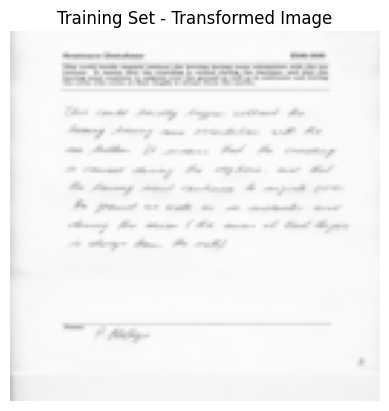

Validation Set - Transformed image size (tensor shape): torch.Size([3, 128, 128])


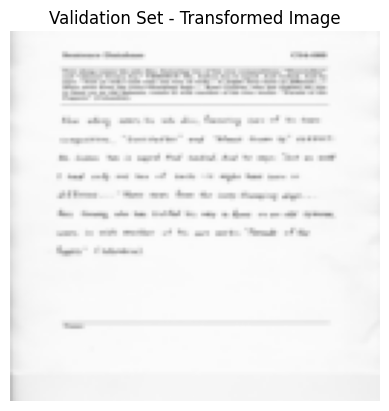

Test Set - Transformed image size (tensor shape): torch.Size([3, 128, 128])


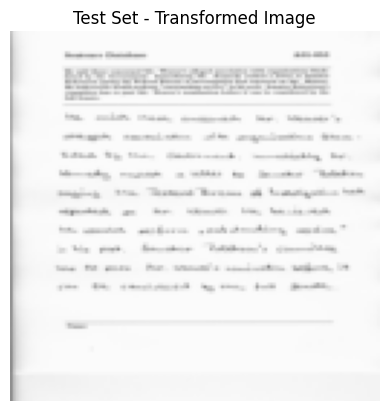

In [18]:
from torchvision import transforms, datasets
from torch.utils.data import random_split
import matplotlib.pyplot as plt

# Define the transformations (including resizing to 128x128)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to 128x128
    transforms.ToTensor(),  # Convert the image to a tensor
])

# Define the path to your dataset
data_dir = 'data'  # Change this to your dataset path

# Load the dataset using ImageFolder with the defined transformations
train_data = datasets.ImageFolder(root=data_dir, transform=transform)

# Check the total size of the dataset
total_size = len(train_data)

# Define sizes for splits
train_size = int(0.8 * total_size)  # 80% for training
val_size = int(0.1 * total_size)    # 10% for validation
test_size = total_size - train_size - val_size  # remaining 10% for testing

# Split the dataset into training, validation, and testing
train_dataset, val_dataset, test_dataset = random_split(
    train_data, [train_size, val_size, test_size]
)

# Print the sizes of each split
print(f'Training size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}')

# Now, let's pick an image from each dataset split and print its size after transformation
to_pil = transforms.ToPILImage()  # To convert tensor back to image

# Function to visualize and print image details from a dataset split
def print_image_info(dataset, title):
    image, _ = dataset[0]  # Get the first image from the dataset (ignore label)
    print(f'{title} - Transformed image size (tensor shape): {image.shape}')
    
    # Convert back to PIL for visualization
    pil_image = to_pil(image)
    plt.imshow(pil_image)
    plt.title(f'{title} - Transformed Image')
    plt.axis('off')
    plt.show()

# Print and visualize an image from each split
print_image_info(train_dataset, "Training Set")
print_image_info(val_dataset, "Validation Set")
print_image_info(test_dataset, "Test Set")


In [19]:
import torch
from torch.utils.data import DataLoader

# Define batch size
batch_size = 16  # Adjust as needed

# Create DataLoaders for each split
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Example of checking the size of each DataLoader
print(f'Train loader size: {len(train_loader)} batches')
print(f'Validation loader size: {len(val_loader)} batches')
print(f'Test loader size: {len(test_loader)} batches')


Train loader size: 77 batches
Validation loader size: 10 batches
Test loader size: 10 batches


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN Encoder
class CNNEncoder(nn.Module):
    def __init__(self):
        super(CNNEncoder, self).__init__()
        # 5 convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling layer to reduce dimensions
        self.flatten = nn.Flatten()  # Flatten the features to pass to LSTM later

    def forward(self, x):
        # Apply convolutions + pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        # Flatten the output for LSTM input
        x = self.flatten(x)
        return x


In [32]:
class CNN_LSTM(nn.Module):
    def __init__(self, cnn_encoder, hidden_size=512, num_layers=2, num_classes=10):
        super(CNN_LSTM, self).__init__()
        self.cnn_encoder = cnn_encoder  # CNN for feature extraction
        self.lstm = nn.LSTM(input_size=512, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # Final fully connected layer for classification

    def forward(self, x):
        # CNN extracts features
        cnn_features = self.cnn_encoder(x)  # [batch_size, num_features]
        
        # Reshape for LSTM input (batch_size, sequence_length, input_size)
        cnn_features = cnn_features.unsqueeze(1)  # Adding a sequence dimension
        
        # Pass through LSTM
        lstm_out, _ = self.lstm(cnn_features)  # LSTM returns output and hidden states
        lstm_out = lstm_out[:, -1, :]  # Get the last time step's output
        
        # Fully connected layer for final classification
        output = self.fc(lstm_out)
        return output


In [33]:
num_classes = len(train_data.classes)


In [34]:
# Define number of output classes based on dataset
num_classes = len(train_data.classes)  # Or manually set this to your class count

cnn_encoder = CNNEncoder()  # Initialize the CNN Encoder
model = CNN_LSTM(cnn_encoder, num_classes=num_classes).to(device)  # Combine with LSTM

# Train the model for 20 epochs
train_model(model, train_loader, val_loader, num_epochs=20)


RuntimeError: input.size(-1) must be equal to input_size. Expected 512, got 8192

In [22]:
# Training the CNN-LSTM model
def train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()  # Loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizer

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        for inputs, labels in train_loader:  # Loop over training batches
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU if available
            
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Track loss
            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

        # Validation step (optional, you can also implement validation)
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        print(f'Validation Loss after epoch {epoch+1}: {val_loss/len(val_loader)}')


In [23]:
from torch.utils.data import DataLoader

# Assuming you have `train_dataset`, `val_dataset`, and `test_dataset` as splits
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cnn_encoder = CNNEncoder()  # Initialize the CNN Encoder
model = CNN_LSTM(cnn_encoder).to(device)  # Combine with LSTM

# Train the model for 20 epochs
train_model(model, train_loader, val_loader, num_epochs=20)


NameError: name 'num_classes' is not defined

import os
import cv2 

def walk_through_dir_with_lengths(dir_path):
    inputs = []  
    targets = [] 
    input_lengths = []  
    target_lengths = []  
    for dirpath, dirnames, filenames in os.walk(dir_path):
        for filename in filenames:
            if filename.endswith('.png') or filename.endswith('.jpg'):
                # Get image path
                image_path = os.path.join(dirpath, filename)
                inputs.append(image_path)

               
                label = os.path.splitext(filename)[0]
                targets.append(label)

               
                img = cv2.imread(image_path)
                input_length = img.shape[1]  
                input_lengths.append(input_length)

                # Calculate target length (length of the label text)
                target_length = len(label)
                target_lengths.append(target_length)

    return inputs, targets, input_lengths, target_lengths



dir_path = 'data'
inputs, targets, input_lengths, target_lengths = walk_through_dir_with_lengths(dir_path)


print("Inputs (image file paths):", inputs[:5])
print("Targets (labels):", targets[:5])
print("Input lengths (image widths):", input_lengths[:5])
print("Target lengths (label lengths):", target_lengths[:5])


from collections import defaultdict

# Create a dictionary to map each unique character to an integer
def create_char_dict(labels):
    char_set = set()
    for label in labels:
        char_set.update(list(label))
    
    # Map each character to a unique integer
    char_to_idx = {char: idx + 1 for idx, char in enumerate(sorted(char_set))}  # Start indexing from 1
    char_to_idx['<PAD>'] = 0  # Optionally, reserve 0 for padding if necessary
    
    return char_to_idx

# Encode labels as sequences of integers
def encode_labels(labels, char_to_idx):
    encoded_labels = []
    for label in labels:
        encoded_label = [char_to_idx[char] for char in label]
        encoded_labels.append(encoded_label)
    
    return encoded_labels

# Example usage
char_to_idx = create_char_dict(targets)  # targets is your list of label strings
encoded_targets = encode_labels(targets, char_to_idx)

print(f"Character to Index Mapping: {char_to_idx}")
print(f"Encoded Targets: {encoded_targets[:5]}")  # Display first 5 encoded labels


from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    images, labels, target_lengths = zip(*batch)
    
    # Pad labels to the max length in the batch
    labels_padded = pad_sequence([torch.tensor(label) for label in labels], batch_first=True, padding_value=0)
    
    return torch.stack(images), labels_padded, torch.tensor(target_lengths)

# Use collate_fn in DataLoader
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)


In [60]:
import random

def print_sample(dataset, sample_idx):
    data_tensor, target_tensor, target_length = dataset[sample_idx]
    print(f"Sample Index: {sample_idx}")
    print(f"Data Tensor: {data_tensor}")
    print(f"Target Tensor: {target_tensor}")
    print(f"Target Length: {target_length}")
dataset = MyDataset(sample_data_list, sample_labels_list)

    # Print a sample from the dataset
    random_idx = random.randint(0, len(dataset) - 1)  # Random index to sample
    print_sample(dataset, random_idx)

In [42]:
def ctc_loss_fn(predictions, targets, input_lengths, target_lengths):
    # Log probabilities for CTC
    log_probs = F.log_softmax(predictions, dim=1)
    loss = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)  # 0 is the blank label
    return loss(log_probs, targets, input_lengths, target_lengths)
